In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from matplotlib import cm
import os
import pandas as pd

In [9]:
def get_data_mini_zero(folder, setting, step, zero=True, moving_step=3):
    temp = list()
    seeds = [222, 223, 224, 225]
    for seed in seeds: 
        try: 
            if zero: foldername = "./results/miniimagenet/{}/{}_seed{}/FINAL_zero.csv".format(folder, setting, seed)
            else: foldername = "./results/miniimagenet/{}/{}_seed{}/FINAL_original.csv".format(folder, setting, seed)
            data = genfromtxt(foldername, delimiter=' ')[:,step]
            temp.append(data)
        except:
            pass
    return moving_average(np.mean(temp, axis=0), moving_step),  moving_average(np.std(temp, axis=0), moving_step)
def moving_average(x, w):
    return np.concatenate((x[:5],np.convolve(x[5:], np.ones(w), 'valid') / w))

<Figure size 432x288 with 0 Axes>

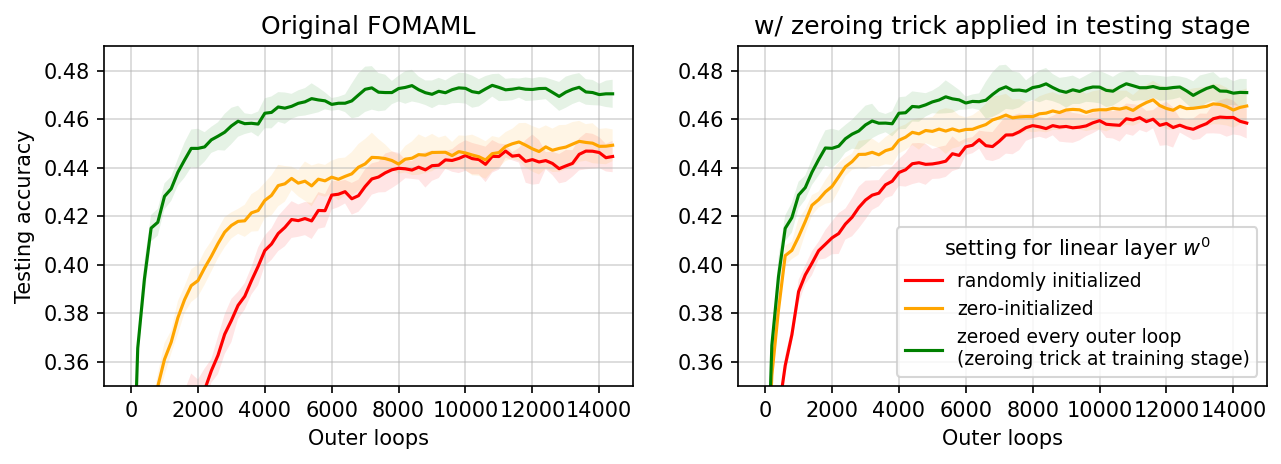

In [11]:
fill_color = True
labels = [
    "randomly initialized", 
    "zero-initialized", 
    "zeroed every outer loop \n(zeroing trick at training stage)",
]

plt.figure()
fig, axes = plt.subplots(1,2,figsize=(10,3), sharex=False, dpi=150)
for step, ax, zeroing_status in zip([1,1],axes.flatten(),[False,True]):
    mean, std = get_data_mini_zero("testing_stage_zeroing", "mini_5w1s15q_FO_initvar1.0", step, zero=zeroing_status)
    ax.plot(np.arange(len(mean))*200, mean, label=labels[0], c="red")
    if fill_color: ax.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="red", alpha=0.1)
    mean, std = get_data_mini_zero("testing_stage_zeroing", "mini_5w1s15q_FO_initvar0.0", step, zero=zeroing_status)
    ax.plot(np.arange(len(mean))*200, mean, label=labels[1], c="orange")
    if fill_color: ax.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="orange", alpha=0.1)
    mean, std = get_data_mini_zero("testing_stage_zeroing", "mini_5w1s15q_FO_zero1_initvar1.0", step, zero=zeroing_status)
    ax.plot(np.arange(len(mean))*200, mean, label=labels[2], c="green")
    if fill_color: ax.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="green", alpha=0.1)

for i, ax in enumerate(axes.flatten()):
    ax.grid(which='major', alpha=0.5)
    ax.tick_params(axis='both', which='major')
    ax.set_ylim([0.35,0.49])
    ax.set_xlim([-800,15000])    
    ax.set_xlabel("Outer loops")

axes[0].set_ylabel("Testing accuracy")
axes[1].legend(title=r"setting for linear layer $w^0$", title_fontsize=10, fontsize=9)
axes[0].set_title("Original FOMAML")
axes[1].set_title("w/ zeroing trick applied in testing stage")
plt.savefig("./images/mini_test_zero_20220301.pdf", bbox_inches='tight')